<a href="https://colab.research.google.com/github/paul821/class-stuff/blob/main/kell_graph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


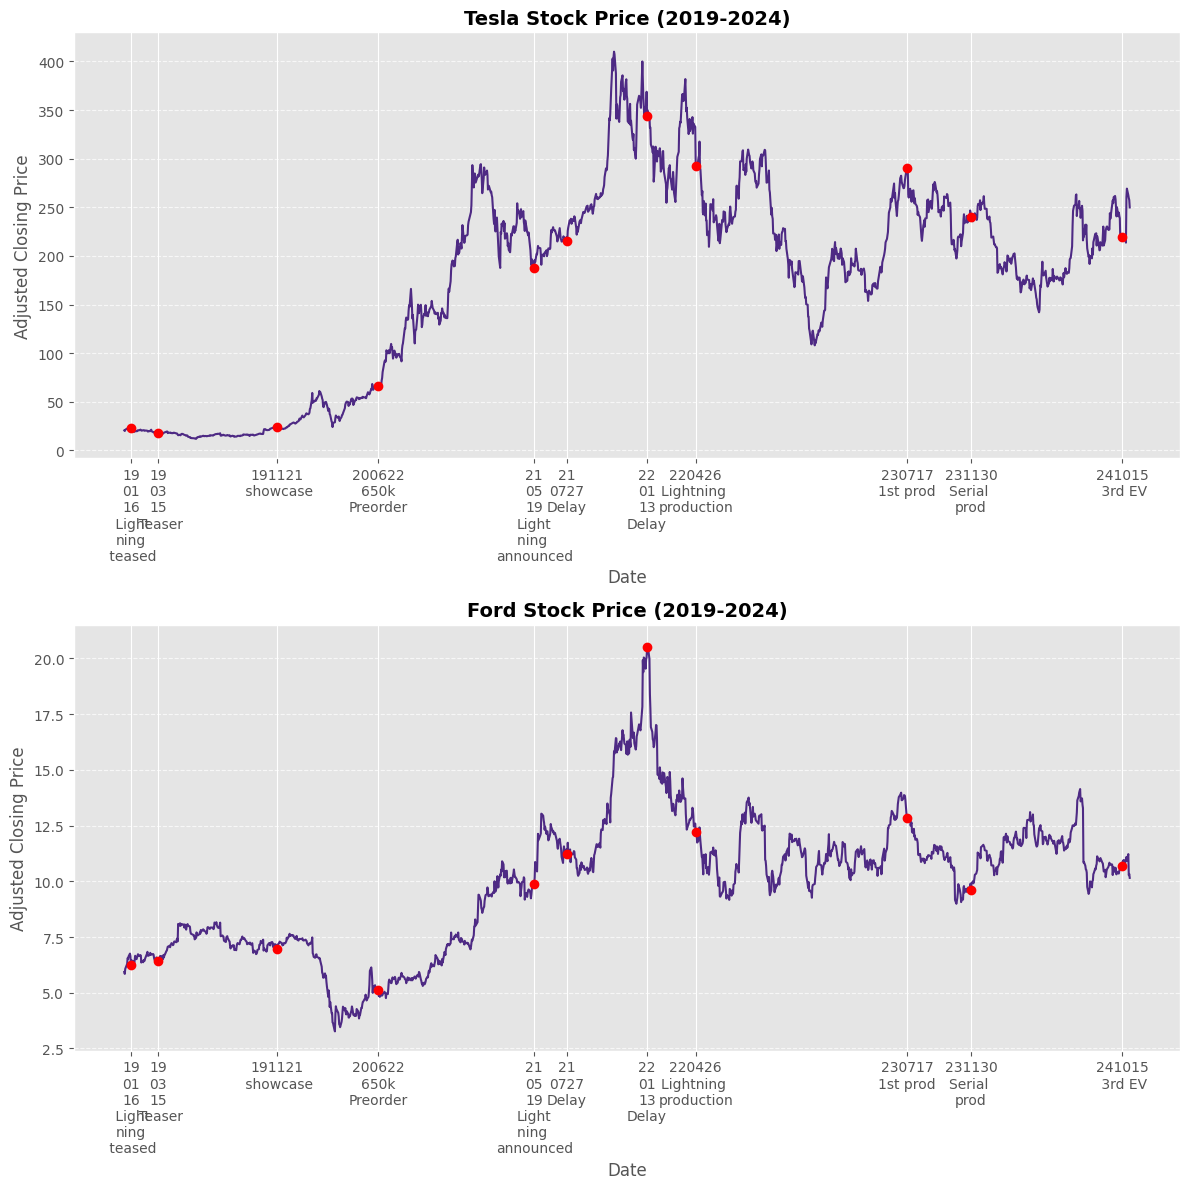

In [ ]:
# prompt: both subplots should have the normal x ticks (for every year) AND the labeled ticks. also the graph color should be #4E2A84 not red, and the dot colors should be yellow

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download Tesla stock data
tesla = yf.download("TSLA", start="2019-01-01", end="2024-11-01")

# Download Ford stock data
ford = yf.download("F", start="2019-01-01", end="2024-11-01")

# Dates to mark
dates_to_mark = ['2019-01-16','2019-03-15','2019-11-21', '2020-06-22', '2022-01-13','2021-05-19', '2021-07-27', '2022-04-26', '2023-07-17', '2023-11-30','2024-10-15']
dates = pd.to_datetime(dates_to_mark)
filler_labels = ['19\n01\n16\n Light\nning\n teased','19\n03\n15\n Teaser','191121\n showcase', '200622\n650k\nPreorder',
                 '22\n01\n13\nDelay','21\n05\n19\nLight\nning \nannounced', '21\n0727\nDelay', '220426\nLightning \nproduction', '230717\n1st prod',
                 '231130\nSerial \nprod','241015\n 3rd EV']

# Function to plot stock data with markers
def plot_stock_data(data, title, dates_to_mark, ax):
    ax.plot(data["Adj Close"], color='#4E2A84', linewidth=1.5)  # Set graph color

    dates = pd.to_datetime(dates_to_mark)
    for date in dates:
        try:
            price = data.loc[date.strftime('%Y-%m-%d'), 'Adj Close']
            ax.plot(date, price, 'o', color='red', markersize=6) # Set dot color
        except KeyError:
            print(f"Date {date} not found in {title} data")

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Adjusted Closing Price", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    #Set x ticks
    ax.set_xticks(dates)
    ax.set_xticklabels(filler_labels) #Set x tick labels

# Create a figure and an axes
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot Tesla data on the first subplot
plot_stock_data(tesla, "Tesla Stock Price (2019-2024)", dates_to_mark, axs[0])

# Plot Ford data on the second subplot
plot_stock_data(ford, "Ford Stock Price (2019-2024)", dates_to_mark, axs[1])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()